Required libraries

In [1]:
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# model used 
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression



Read the data


In [2]:
df_train=pd.read_csv('train_data.csv')
df_test=pd.read_csv('test_data.csv')
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:

print(df_train.shape)

(614, 13)


In [4]:
#finding null values columns
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


handling the missing values


In [26]:
df_train=df_train.drop(['Loan_ID'],axis=1)
df_test=df_test.drop(['Loan_ID'],axis=1)

In [27]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
for col in null_cols:
    print(f"{col}:\n{df_train[col].value_counts()}\n","-"*50)
    df_train[col] = df_train[col].fillna(
    df_train[col].dropna().mode().values[0] )

    #cheching agian null values
df_train.isnull().sum().sort_values(ascending=False)

Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64
 ----------------------------------------

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data visualisation 


In [29]:
# Numerical values 
num = df_train.select_dtypes('number').columns.to_list()

#Categorical values 
cat = df_train.select_dtypes('object').columns.to_list()

#Dataset 
loan_num = df_train[num]
loan_cat = df_train[cat]

In [30]:
print(num)
print(cat)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Loan_Status
Y    422
N    192
Name: count, dtype: int64


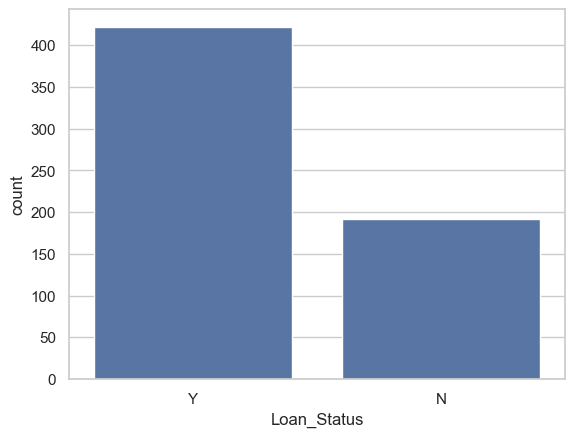

In [31]:
## Lets plot the Loan_Status columns first to know the propotion of accepted proposals and rejected ones 

print(df_train[cat[-1]].value_counts())

sns.set(style="whitegrid")
sns.countplot(x=df_train[cat[-1]])


plt.show()

Numeric columns histogram to get get the skewness


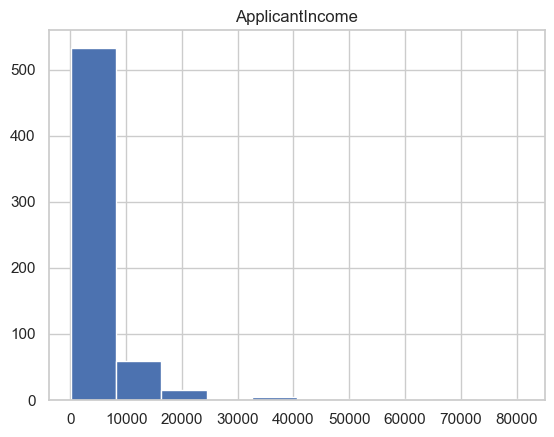

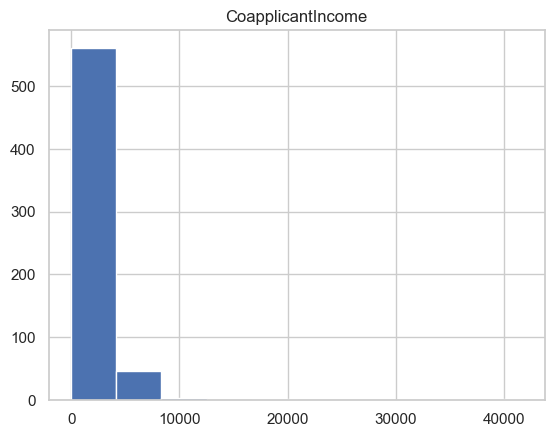

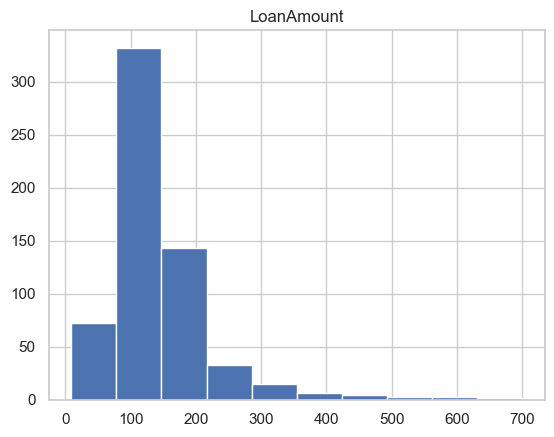

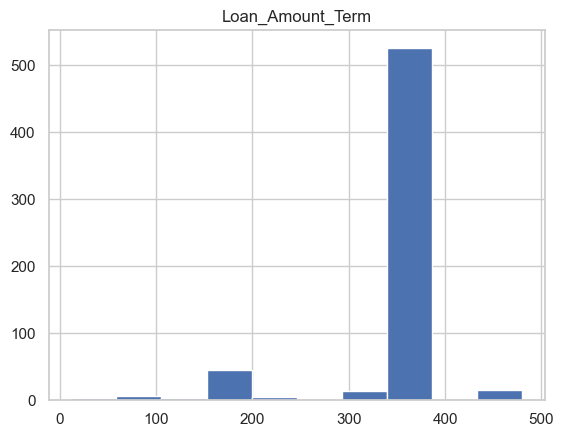

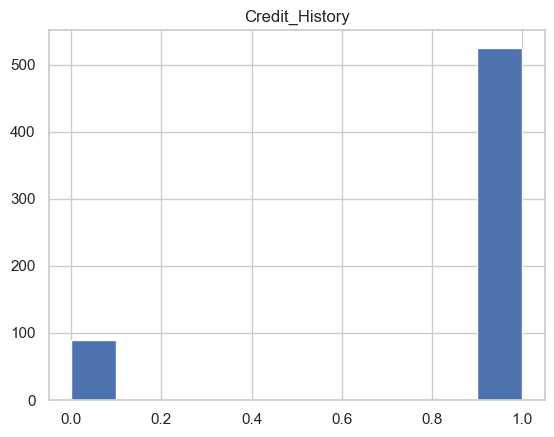

In [32]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

catergorical data countplot


using Encoding techniques 

In [34]:
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
# adding the new numeric values from the to_numeric variable to both datasets
df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# converting the Dependents column
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
# Droping previous dependent columns
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

# Concating new Dependents column with datasets

df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)


# Checking info of both datasets
print(df_train.info(), "\n\n", df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------        

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_7564\1514684673.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
C:\Users\ROHIT\AppData\Local\Temp\ipykernel_7564\1514684673.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


In [35]:
df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0


correlation matrix


<Axes: >

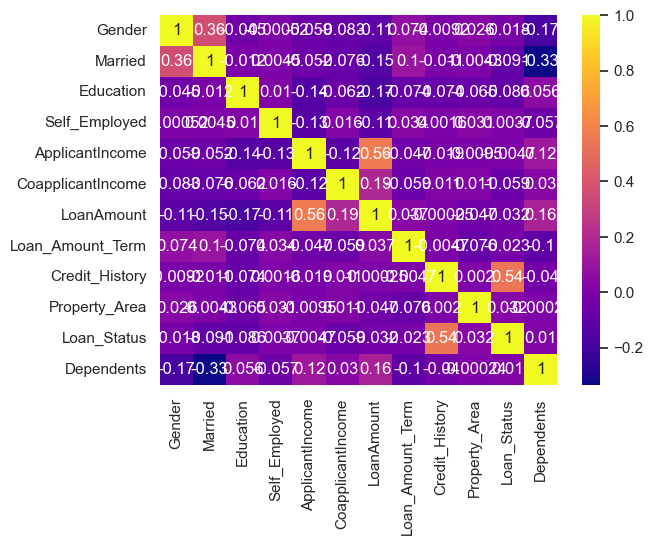

In [36]:
sns.heatmap(df_train.corr(), annot=True, cmap='plasma')

applying the model on data


In [37]:
x=df_train.drop(['Loan_Status'],axis=1)
y=df_train['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=None)

Decision Tree


In [38]:
#using decision tree CART algorithm 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
dt.fit(x_train,y_train)
y_predict=dt.predict(x_test)



In [39]:
print(classification_report(y_test,y_predict))

print(confusion_matrix(y_test,y_predict))
DT_SC=accuracy_score(y_test,y_predict)


print((DT_SC)*100)


              precision    recall  f1-score   support

           0       0.85      0.52      0.64        56
           1       0.82      0.96      0.89       129

    accuracy                           0.83       185
   macro avg       0.84      0.74      0.77       185
weighted avg       0.83      0.83      0.81       185

[[ 29  27]
 [  5 124]]
82.70270270270271


RandomForest classifier


In [40]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

# Prediciting the values
y_predict = RF.predict(x_test)

# Printing the classification report 
print(classification_report(y_test,y_predict))

## Accuracy Score 
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

## Results of the model
Random_Forest = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})


              precision    recall  f1-score   support

           0       0.76      0.50      0.60        56
           1       0.81      0.93      0.87       129

    accuracy                           0.80       185
   macro avg       0.78      0.72      0.73       185
weighted avg       0.79      0.80      0.79       185

80.0% Accurate


logistic regression


In [41]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

# Predicting the values
y_predict = LR.predict(x_test)


## Printing the classification report
print(classification_report(y_test,y_predict))


## Accuracy Score 
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")


## Results of the model
Logisitic_Regression = pd.DataFrame({'y_test':y_test, 'prediction':y_predict})


              precision    recall  f1-score   support

           0       0.94      0.52      0.67        56
           1       0.82      0.98      0.90       129

    accuracy                           0.84       185
   macro avg       0.88      0.75      0.78       185
weighted avg       0.86      0.84      0.83       185

84.32% Accurate


In [42]:
scores=[LR_SC,RF_SC,DT_SC]
model=pd.DataFrame({'model':['logistic regression','random forest','dicision trees'],'scores':(scores)})
model.sort_values(by='scores',ascending=False)

,model,scores
0,logistic regression,0.843243
2,dicision trees,0.827027
1,random forest,0.800000
